# Lab 4

Authors: Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason

Date: Thursday, October 15th, 2020.

## - Description -

A lot of probability.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

a_frame = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('a_frame(row, col) =', a_frame.shape)
a_frame.head(20) # Print the first 9 entries.

a_frame(row, col) = (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## What are the 25th, 50th, 75th percentiles of the education-num field?

As seen below, 25th percentile is 9, 50th percentile is 10, and 75th percentile is 12.

(that is, 25% of the data is at or below 9 years of education)

In [27]:
edu = a_frame[['education-num']]
print(f"%: {edu.quantile([.25, .5, .75])}")

%:       education-num
0.25            9.0
0.50           10.0
0.75           12.0


## What is the probability that an adult makes more than $50k given that their education-num is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

Probability of A given B: $ P(A | B) = \frac{P(A, B)}{P(B)}.$  Note that in this case, A and B are not independent.

In [28]:
edu_income = a_frame[['education-num', 'income']]
edu_inc_f_arr = edu_income.to_numpy()

# 25th percentile
low_total = 0 # P(B)
low_upper = 0 # P(A, B)
# 50th percentile
mid_total = 0
mid_upper = 0
# 75th percentile
hi_total = 0
hi_upper = 0

# Elem 0 is edu-num, Elem 1 is income
for elem in edu_inc_f_arr:
    if elem[0] >= 0 and elem[0] <= 9:
        low_total += 1
        if elem[1] == '>50K':
            low_upper += 1
    elif elem[0] > 9 and elem[0] <= 10:
        mid_total += 1
        if elem[1] == '>50K':
            mid_upper += 1
    else:
        hi_total += 1
        if elem[1] == '>50K':
            hi_upper += 1

print(f'25th percentile probability: {low_upper}/{low_total} -> {low_upper/low_total}')
print(f'50th percentile probability: {mid_upper}/{mid_total} -> {mid_upper/mid_total}')
print(f'75th percentile probability: {hi_upper }/{hi_total } -> {hi_upper /hi_total }')

25th percentile probability: 1919/14754 -> 0.13006642266503998
50th percentile probability: 1387/7291 -> 0.19023453572898094
75th percentile probability: 4535/10516 -> 0.4312476226702168


## Plot the change in probability that a person makes more and less than $50k given their years of education.

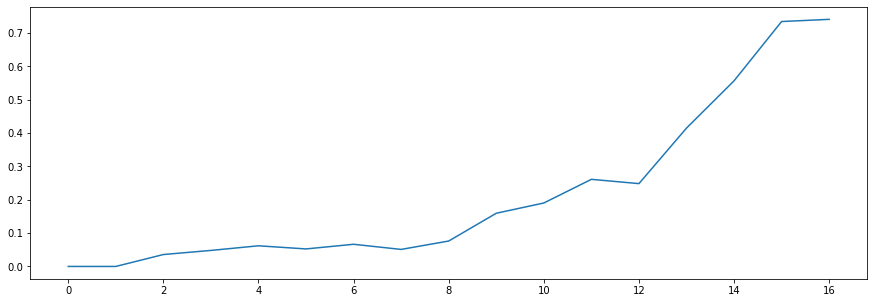

In [29]:
# Create this will be used to track each the number of people
# who make over $50K based off of their education years.
# COLS: represents # of people with that education-num.
# ROWS: 1st row for those who make over $50K
#       2nd row for total who are under that education-num
edu_num_arr = np.zeros((2, 17), dtype=int)
t = np.linspace(0, 16, num=17, endpoint=True)

for elem in edu_inc_f_arr:
    edu_num_arr[(1, elem[0])] += 1
    if elem[1] == '>50K':
        edu_num_arr[(0, elem[0])] += 1

y = np.array([n / d for n, d in zip(edu_num_arr[0], edu_num_arr[1])])
y[0] = 0 # fixes divide by 0

#print(edu_num_arr)
plt.plot(t, y)
pass

## What is the covariance between the number of hours worked per week and education-num?

Note that the covariance between two numbers is defined by: 
$$\operatorname{cov}(X,\; Y) = \mathbb{E}\left [(X - \mathbb{E}X)(Y - \mathbb{E}Y) \right]$$

In [30]:
X = a_frame[['education-num']].to_numpy()
Y = a_frame[['hr_per_week']].to_numpy()

def E(X):
    return sum(X)/len(X)

def cov(X, Y):
    xbar = E(X)
    ybar = E(Y)
    xs = [i - xbar for i in X]
    ys = [i - ybar for i in Y]

    return E([xi * yi for xi, yi in zip(xs, ys)])

print(f'X := years of education, Y := weekly work hours.\n')
print(f'cov(X, Y) = {cov(X, Y)}\n')
print('Note: this implies a dependance!')

X := years of education, Y := weekly work hours.

cov(X, Y) = [4.70519344]

Note: this implies a dependance!


## Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which illustrates the spread of hours worked among adults who make both more and less than $50k.

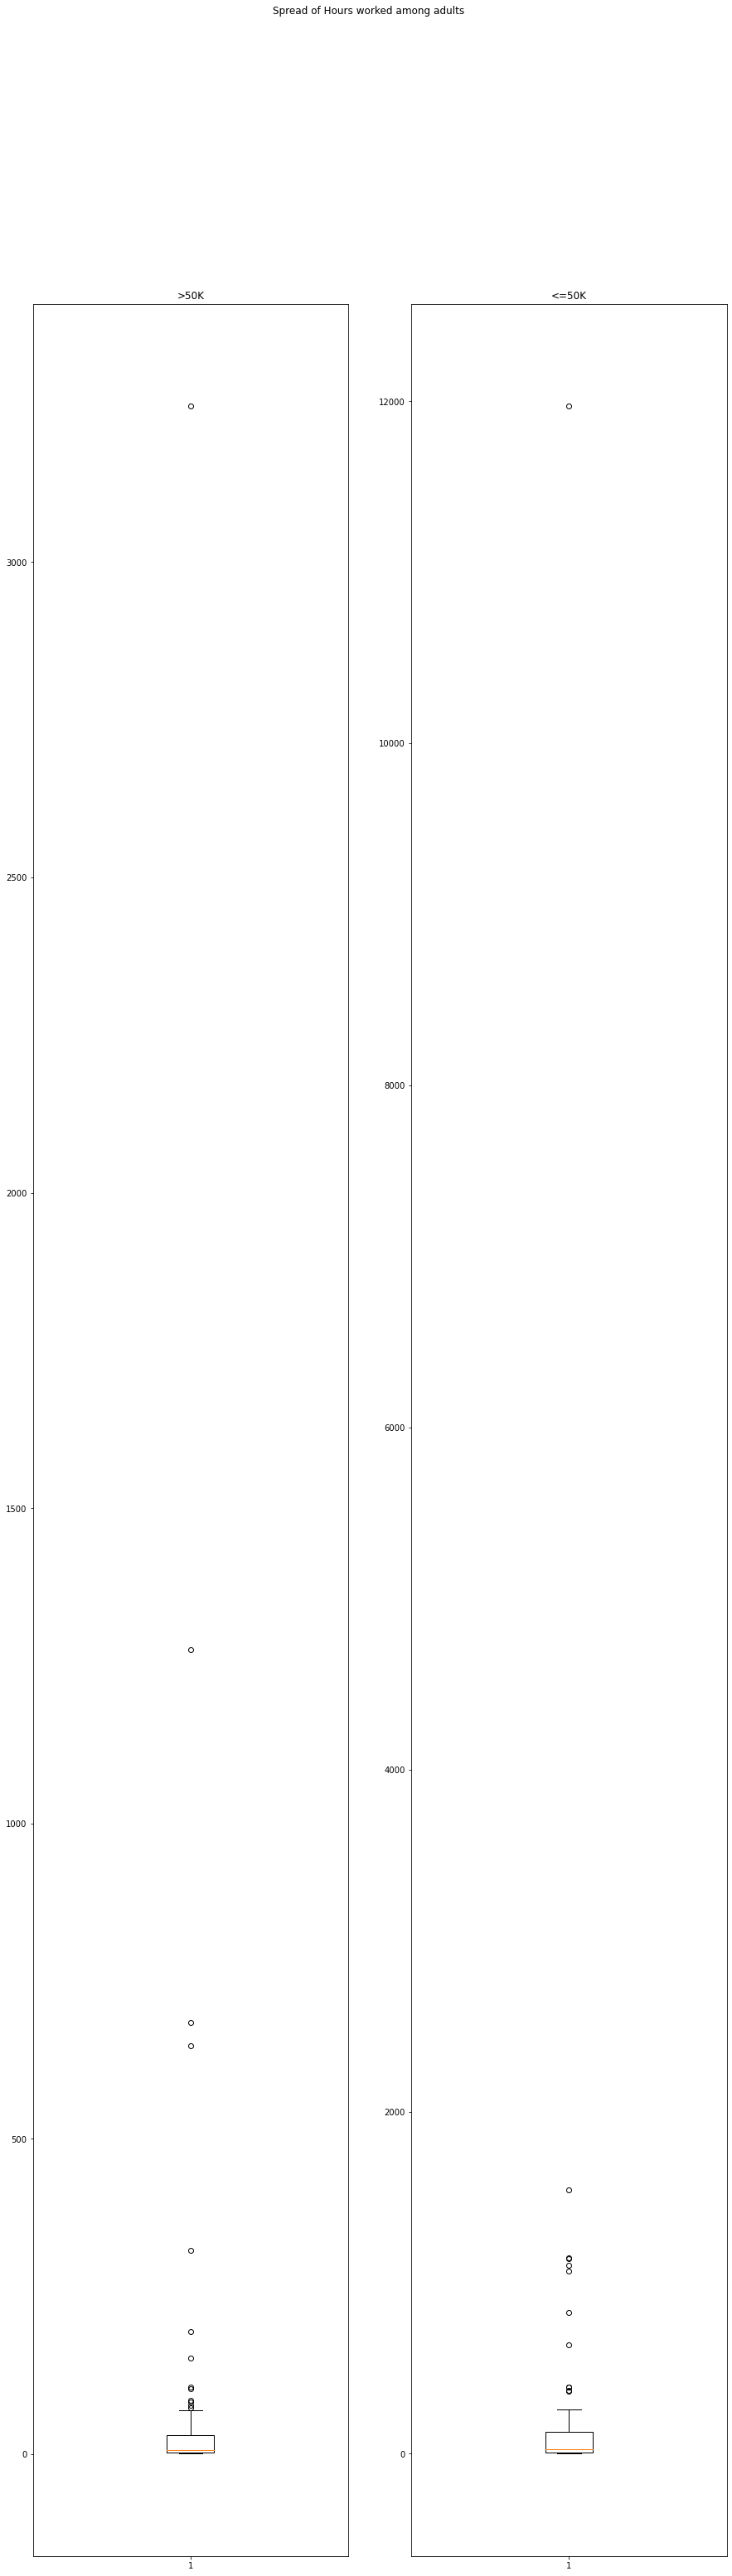

In [31]:
pay = a_frame[['hr_per_week','income']]
g_50k = pay[pay['income'] == ">50K"].groupby('hr_per_week').count().to_numpy() 
l_50k = pay[pay['income'] == "<=50K"].groupby('hr_per_week').count().to_numpy()
g_50k = [i[0] for i in g_50k]
l_50k = [i[0] for i in l_50k]

plt.rcParams['figure.figsize'] = [15, 50]
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Spread of Hours worked among adults')
ax1.set_title('>50K')
ax2.set_title('<=50K')

ax1.boxplot(g_50k)
ax2.boxplot(l_50k)
pass

## Use  thepandas.DataFrame.boxplotfunctionality  to  create  a  box-and-whisker  plot  which illustrates the spread of hours worked among adults from each native country and who makemore and less than $50k.

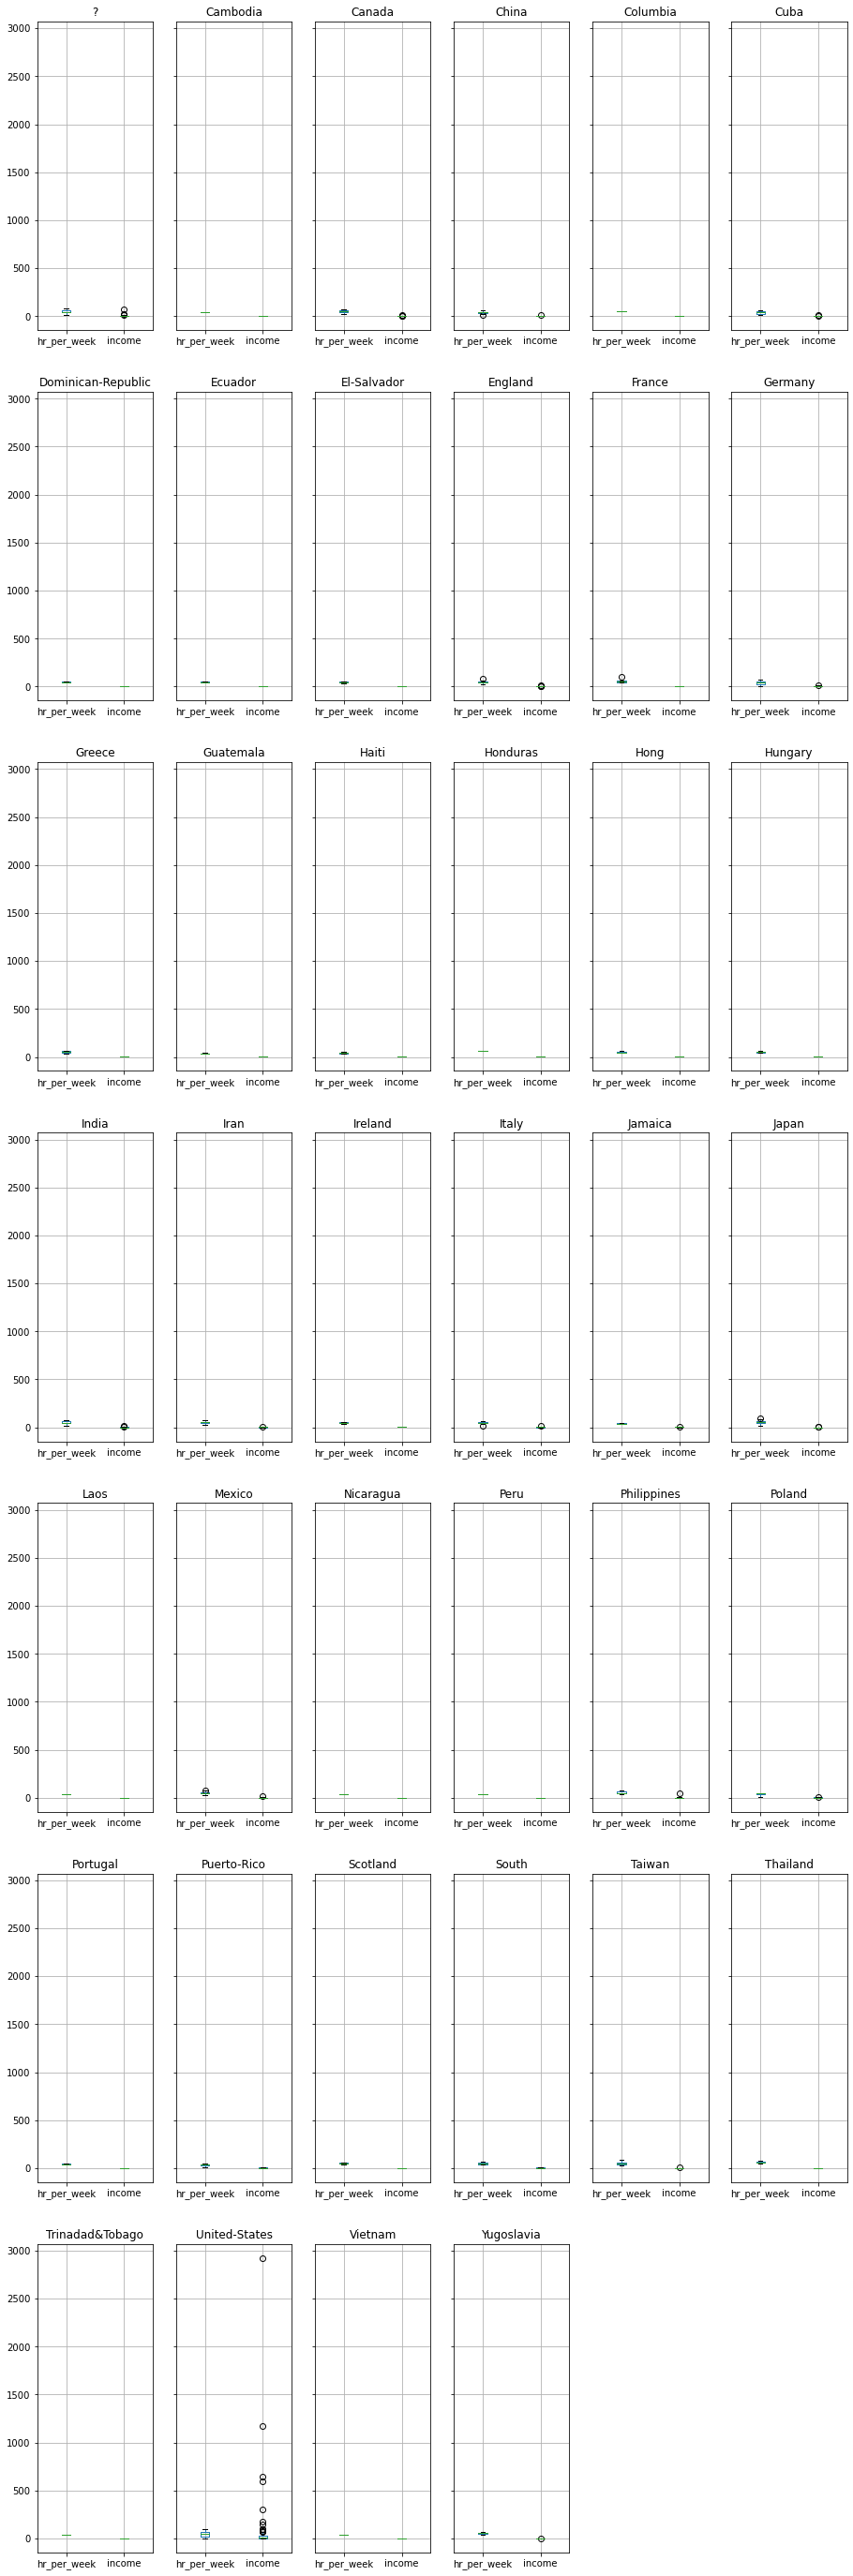

In [32]:
pay = a_frame[['hr_per_week','income', 'country']]
g_50k = pay[pay['income'] == ">50K"].groupby(['hr_per_week', 'country']).count().reset_index().groupby('country')
l_50k = pay[pay['income'] == "<=50K"].groupby(['hr_per_week', 'country']).count().reset_index().groupby('country')
g_50k.boxplot()
plt.rcParams['figure.figsize'] = [15, 5]
pass

## Create a table where entry (x, y) contains the conditional probability P(A random adult has level of education x | their education-num is y).

In [33]:
ed = a_frame[['education-num', 'education']]
ed = ed.groupby(['education-num', 'education']).count().reset_index()
edu_num = [i[0] for i in ed.groupby("education-num").count().iterrows()]
edu = [i[0] for i in ed.groupby("education").count().iterrows()]
prob_A_B = a_frame[['education-num', 'education']]
temp = prob_A_B["education-num"].to_numpy()
temp1 = prob_A_B["education"].to_numpy()
count = 0
final = []
for en in edu_num:
    for ed in edu:
        P_A = 0
        P_B = 0
        P_B_A = 0
        P_A_B = 0
        for index in range(0, len(temp)):
            if temp[index] == en:
                P_A += 1
            if temp1[index] == ed:
                P_B += 1
            if temp[index] == en and temp1[index] == ed:
                P_B_A += 1
        P_A = P_A/len(temp)
        P_B = P_B/len(temp)
        P_B_A = (P_B_A/len(temp))/P_A
        P_A_B = (P_B_A * P_A)/P_B
        final.append(P_A_B)
        print("Edu-Num = ", en, "Education = ", ed, "Probability = ", P_A_B)

Edu-Num =  1 Education =  10th Probability =  0.0
Edu-Num =  1 Education =  11th Probability =  0.0
Edu-Num =  1 Education =  12th Probability =  0.0
Edu-Num =  1 Education =  1st-4th Probability =  0.0
Edu-Num =  1 Education =  5th-6th Probability =  0.0
Edu-Num =  1 Education =  7th-8th Probability =  0.0
Edu-Num =  1 Education =  9th Probability =  0.0
Edu-Num =  1 Education =  Assoc-acdm Probability =  0.0
Edu-Num =  1 Education =  Assoc-voc Probability =  0.0
Edu-Num =  1 Education =  Bachelors Probability =  0.0
Edu-Num =  1 Education =  Doctorate Probability =  0.0
Edu-Num =  1 Education =  HS-grad Probability =  0.0
Edu-Num =  1 Education =  Masters Probability =  0.0
Edu-Num =  1 Education =  Preschool Probability =  1.0
Edu-Num =  1 Education =  Prof-school Probability =  0.0
Edu-Num =  1 Education =  Some-college Probability =  0.0
Edu-Num =  2 Education =  10th Probability =  0.0
Edu-Num =  2 Education =  11th Probability =  0.0
Edu-Num =  2 Education =  12th Probability = 

## Create a table where entry (x, y) contains the conditional probability of having marital status x given that they have occupation y.

In [34]:
ms = a_frame[['marital-status', 'occupation']]
ms = ms.groupby(['marital-status', 'occupation']).count().reset_index()
marital = [i[0] for i in ms.groupby("marital-status").count().iterrows()]
occup = [i[0] for i in ms.groupby("occupation").count().iterrows()]
prob_A_B = a_frame[['marital-status', 'occupation']]
temp = prob_A_B["marital-status"].to_numpy()
temp1 = prob_A_B["occupation"].to_numpy()
count = 0
final = []
for m in marital:
    for o in occup:
        P_A = 0
        P_B = 0
        P_B_A = 0
        P_A_B = 0
        for index in range(0, len(temp)):
            if temp[index] == m:
                P_A += 1
            if temp1[index] == o:
                P_B += 1
            if temp[index] == m and temp1[index] == o:
                P_B_A += 1
        P_A = P_A/len(temp)
        P_B = P_B/len(temp)
        P_B_A = (P_B_A/len(temp))/P_A
        P_A_B = (P_B_A * P_A)/P_B
        final.append(P_A_B)
        print("Marital = ", m, "Occupation = ", o, "Probability = ", P_A_B)

Marital =  Divorced Occupation =  ? Probability =  0.10037981551817689
Marital =  Divorced Occupation =  Adm-clerical Probability =  0.21724137931034482
Marital =  Divorced Occupation =  Armed-Forces Probability =  0.0
Marital =  Divorced Occupation =  Craft-repair Probability =  0.11319834105879482
Marital =  Divorced Occupation =  Exec-managerial Probability =  0.1485489424495819
Marital =  Divorced Occupation =  Farming-fishing Probability =  0.06438631790744466
Marital =  Divorced Occupation =  Handlers-cleaners Probability =  0.09343065693430656
Marital =  Divorced Occupation =  Machine-op-inspct Probability =  0.13836163836163837
Marital =  Divorced Occupation =  Other-service Probability =  0.1520485584218513
Marital =  Divorced Occupation =  Priv-house-serv Probability =  0.18791946308724833
Marital =  Divorced Occupation =  Prof-specialty Probability =  0.13019323671497585
Marital =  Divorced Occupation =  Protective-serv Probability =  0.12172573189522343
Marital =  Divorced 

## What is the conditional probability of making more or less than $50k given that a person works in each different occupation?

In [35]:
io = a_frame[['income', 'occupation']]
g_50k = io[io['income'] == ">50K"].groupby('occupation').count().reset_index()
l_50k = io[io['income'] == "<=50K"].groupby('occupation').count().reset_index()
occ = [i[0] for i in io.groupby("occupation").count().iterrows()]
prob_A_B = a_frame[['marital-status', 'occupation']]
g = io[io['income'] == ">50K"]['occupation'].to_numpy()
l = io[io['income'] == "<=50K"]['occupation'].to_numpy()
pa = io[io['income'] == ">50K"].groupby("income").count()
P_A = pa["occupation"][0]/len(io)
ks = a_frame[['income', 'occupation']]['occupation']
print(">50K")
for o in occ:
    P_B = 0
    P_B_A = 0
    P_A_B = 0
    for i in range(0,len(ks)):
        if ks[i] == o:
            P_B += 1
    for index in range(0, len(g)):
        if g[index] == o:
            P_B_A += 1
    P_B_A = (P_B_A/len(io))/P_A
    P_B = P_B/len(ks)
    P_A_B = (P_B_A * P_A)/P_B
    #print(P_B_A)
    print("Occ = ", o, "Probability = ", P_A_B)
print("")
print("<=50K")
pa = io[io['income'] == "<=50K"].groupby("income").count()
P_A = pa["occupation"][0]/len(io)
for o in occ:
    P_B = 0
    P_B_A = 0
    P_A_B = 0
    for i in range(0,len(ks)):
        if ks[i] == o:
            P_B += 1
    for index in range(0, len(l)):
        if l[index] == o:
            P_B_A += 1
    P_B_A = (P_B_A/len(io))/P_A
    P_B = P_B/len(ks)
    P_A_B = (P_B_A * P_A)/P_B
    #print(P_B_A)
    print("Occ = ", o, "Probability = ", P_A_B)


>50K
Occ =  ? Probability =  0.1036353771025502
Occ =  Adm-clerical Probability =  0.13448275862068965
Occ =  Armed-Forces Probability =  0.1111111111111111
Occ =  Craft-repair Probability =  0.22664064405952672
Occ =  Exec-managerial Probability =  0.4840137727496311
Occ =  Farming-fishing Probability =  0.11569416498993965
Occ =  Handlers-cleaners Probability =  0.06277372262773723
Occ =  Machine-op-inspct Probability =  0.12487512487512487
Occ =  Other-service Probability =  0.04157814871016692
Occ =  Priv-house-serv Probability =  0.006711409395973154
Occ =  Prof-specialty Probability =  0.44903381642512075
Occ =  Protective-serv Probability =  0.325115562403698
Occ =  Sales Probability =  0.26931506849315073
Occ =  Tech-support Probability =  0.3049568965517242
Occ =  Transport-moving Probability =  0.20037570444583594

<=50K
Occ =  ? Probability =  0.8963646228974498
Occ =  Adm-clerical Probability =  0.8655172413793103
Occ =  Armed-Forces Probability =  0.8888888888888888
Occ = 

## x.  Plot the change in probability that a person makes more and less than $50k given the amount that they work per week.

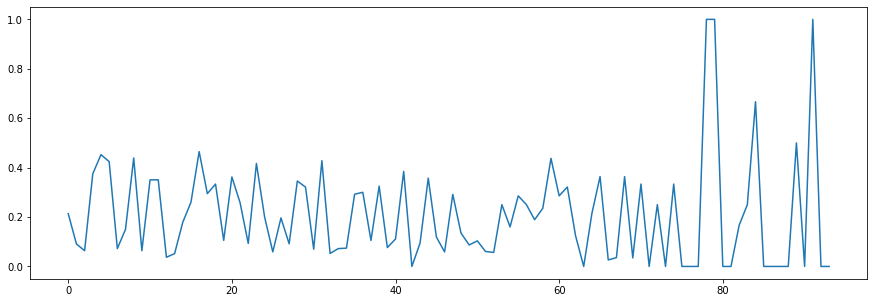

In [36]:
inc_vs_hrs = a_frame[['hr_per_week', 'income']]

total = {}
count = {}
for _, row in inc_vs_hrs.iterrows():
    if row[0] not in total.keys():
        total[row[0]] = 0
    else:
        total[row[0]] += 1
    
    if row[1] == '>50K':
        if row[0] not in count.keys():
            count[row[0]] = 0
        else:
            count[row[0]] += 1
    else:
        if row[0] not in count.keys():
            count[row[0]] = 0

test = [A / B if B != 0 else 0 for A, B in zip(count.values(), total.values())]
plt.plot(np.arange(0, 94), test)
plt.show()
pass